Load the dataset

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

DATASET_PATH = "./data/auto-mpg-regression/dataset.tsv"

columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
df = pd.read_csv(DATASET_PATH, sep="\t", header=None, names=columns, na_values={"horsepower":"?"})
print(f"The shape of the dataset is {df.shape}")
print(df.head())
print(f"There are {df.isnull().any().any()} missing values in the dataset")

# convert the displacement from cubic inches to liters
CI_TO_LITRE = 0.016387064
df.displacement *= CI_TO_LITRE

The shape of the dataset is (398, 9)
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   model_year  origin                   car_name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino  
There are True missing values in the dataset


let's visualize the distributions of the 5 continuous-valued features

/var/folders/1b/5t27cfwx5ys8870_bck3jc840000gn/T/ipykernel_6649/2195108098.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.displacement,
/var/folders/1b/5t27cfwx5ys8870_bck3jc840000gn/T/ipykernel_6649/2195108098.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df.horsepower.not

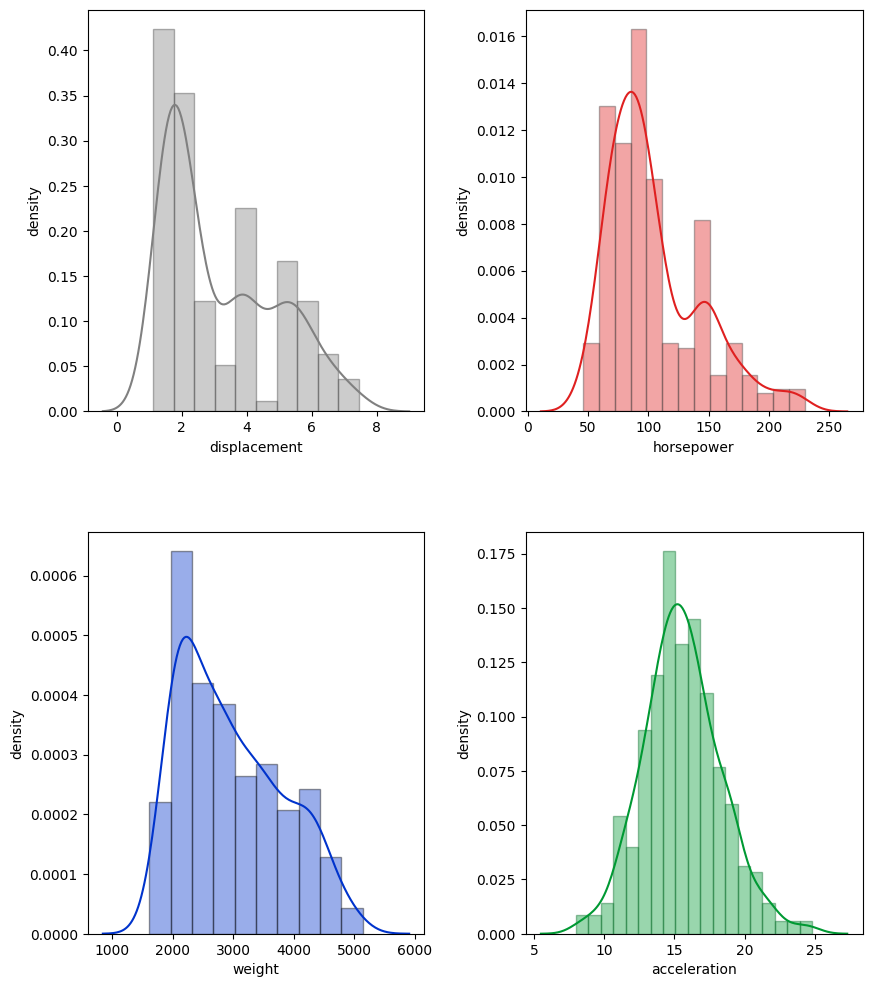

In [64]:
y_labeler = lambda x: x.set_ylabel("density")
y_labeler = np.vectorize(y_labeler)

fig, axes = plt.subplots(2, 2, figsize=(10,12))
y_labeler(axes)

# Plot 'displacement' on the top-left subplot
sns.distplot(df.displacement, 
             color='#808080', 
             ax=axes[0,0], 
             hist_kws=dict(edgecolor="#404040", linewidth=1))

# Plot 'horsepower' (limited only to non-NA values) on the top-right subplot
sns.distplot(df.loc[df.horsepower.notnull(), 'horsepower'], 
                 color='#df2020', ax=axes[0,1], 
                 hist_kws=dict(edgecolor="#404040", linewidth=1))

# Plot 'weight' on the bottom-left subplot
sns.distplot(df.weight, color='#0033cc', ax=axes[1,0], 
                 hist_kws=dict(edgecolor="k", linewidth=1))

# Plot 'acceleration' on the bottom-right subplot
sns.distplot(df.acceleration, color='#009933', ax=axes[1,1],
                 hist_kws=dict(edgecolor="#006622", linewidth=1))

# Adjust space between plots
plt.subplots_adjust(wspace=.3, hspace=.3)

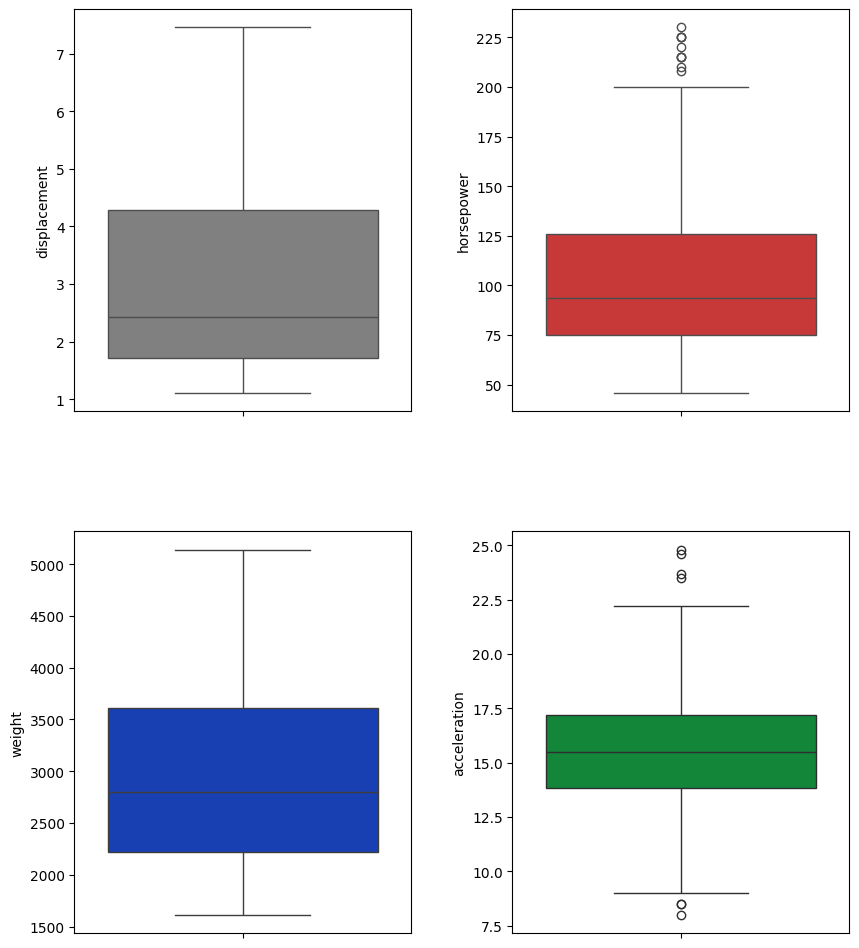

In [65]:
fig, axes = plt.subplots(2, 2, figsize=(10,12))

sns.boxplot(df.displacement, color='#808080', ax=axes[0,0])
sns.boxplot(df.loc[df.horsepower.notnull(), 'horsepower'], 
                color='#df2020', ax=axes[0,1])
sns.boxplot(df.weight, color='#0033cc', ax=axes[1,0])
sns.boxplot(df.acceleration, color='#009933', ax=axes[1,1])
plt.subplots_adjust(wspace=.3, hspace=.3)

In [66]:
# Let's see the frequency counts of each categorical variable
# 'cylinders'
print(df.cylinders.value_counts())
print()
# 'model_year'
print(df.model_year.value_counts())
print()
# 'origin'
print(df.origin.value_counts())

cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64

model_year
73    40
78    36
76    34
82    31
75    30
70    29
79    29
80    29
81    29
71    28
72    28
77    28
74    27
Name: count, dtype: int64

origin
1    249
3     79
2     70
Name: count, dtype: int64


Handling missing values

In [67]:
df.horsepower.fillna(df.horsepower.median(), inplace=True)
df.describe(include='all')

/var/folders/1b/5t27cfwx5ys8870_bck3jc840000gn/T/ipykernel_6649/490234232.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.horsepower.fillna(df.horsepower.median(), inplace=True)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,3.169682,104.304020,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,1.708677,38.222625,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,1.114320,46.000000,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,1.708351,76.000000,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,2.433479,93.500000,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,4.293411,125.000000,3608.000000,17.175000,79.000000,2.000000,NaN


encoding categorical features with one-hot encoding. In one-hot encoding a category value becomes a new column and assigns a 1 or 0 value to the column

In [68]:
categorical_features = ["cylinders", "model_year", "origin"]
df = pd.get_dummies(df, columns=categorical_features)
df.head()

,mpg,displacement,horsepower,weight,acceleration,car_name,cylinders_3,cylinders_4,cylinders_5,cylinders_6,...,model_year_76,model_year_77,model_year_78,model_year_79,model_year_80,model_year_81,model_year_82,origin_1,origin_2,origin_3
0,18.0,5.030829,130.0,3504.0,12.0,chevrolet chevelle malibu,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,15.0,5.735472,165.0,3693.0,11.5,buick skylark 320,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,18.0,5.211086,150.0,3436.0,11.0,plymouth satellite,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,16.0,4.981667,150.0,3433.0,12.0,amc rebel sst,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,17.0,4.948893,140.0,3449.0,10.5,ford torino,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


The categorical variable "car_name" contains a lot of different values, using one-hot encoding might lead to a very sparse dataset, as we need to map a single column to 305 columns.

Let's try to build another column which clusters similar values together and then apply one-hot encoding.

In [69]:
def sanitize_automaker_name(car_name):
  s = car_name.split(' ')[0]
  if s == 'vw' or s == 'vokswagen':
    return car_name.replace(s,'volkswagen')
  if s == 'chevroelt' or s == 'chevy':
    return car_name.replace(s,'chevrolet')
  if s == 'maxda':
    return car_name.replace(s,'mazda')
  if s == 'mercedes':
    return car_name.replace(s,'mercedes-benz')
  if s == 'toyouta':
    return car_name.replace(s,'toyota')
  return car_name

# correct misspelled or abbreviated names
df['car_name'] = df['car_name'].map(lambda x: sanitize_automaker_name(x))
# create a column automaker name which disregards the model
df["automaker_name"] = df["car_name"].map(lambda x: x.split(" ")[0])
print(df['automaker_name'].value_counts())

automaker_name
ford             51
chevrolet        47
plymouth         31
amc              28
dodge            28
toyota           26
datsun           23
volkswagen       22
buick            17
pontiac          16
honda            13
mazda            12
mercury          11
oldsmobile       10
fiat              8
peugeot           8
audi              7
volvo             6
chrysler          6
renault           5
saab              4
opel              4
subaru            4
mercedes-benz     3
cadillac          2
bmw               2
capri             1
hi                1
triumph           1
nissan            1
Name: count, dtype: int64


In [70]:
# create the set of the top 10 automakers
top_10_automakers = set(df["automaker_name"].value_counts()[:10].index)
# label with "other" any automaker_name which is not in the list above
df["automaker_name"] = np.where(
  df["automaker_name"].isin(top_10_automakers), df["automaker_name"], "other"
)

categorical_features = ["automaker_name"]
df = pd.get_dummies(df, columns=categorical_features)

# place the column to be predicted as the last one
columns = df.columns.tolist()
# popping out "mpg" from the list and insert it back at the end
columns.insert(len(columns), columns.pop(columns.index("mpg")))
# popping out "automaker_name_other" from the list and insert it after volkswagen
columns.insert(columns.index("automaker_name_volkswagen"), columns.pop(columns.index("automaker_name_other")))
# popping out "car_name" from the list and insert it right before mpg
columns.insert(-1, columns.pop(columns.index("car_name")))
# refactor the dataframe using this new column index
df = df.loc[:, columns]

df.head()

,displacement,horsepower,weight,acceleration,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,model_year_70,...,automaker_name_datsun,automaker_name_dodge,automaker_name_ford,automaker_name_plymouth,automaker_name_pontiac,automaker_name_toyota,automaker_name_volkswagen,automaker_name_other,car_name,mpg
0,5.030829,130.0,3504.0,12.0,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,chevrolet chevelle malibu,18.0
1,5.735472,165.0,3693.0,11.5,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,buick skylark 320,15.0
2,5.211086,150.0,3436.0,11.0,False,False,False,False,True,True,...,False,False,False,True,False,False,False,False,plymouth satellite,18.0
3,4.981667,150.0,3433.0,12.0,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,amc rebel sst,16.0
4,4.948893,140.0,3449.0,10.5,False,False,False,False,True,True,...,False,False,True,False,False,False,False,False,ford torino,17.0


Building the predictive model

In [71]:
X = df.iloc[:, :-2]
X.head()

,displacement,horsepower,weight,acceleration,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,model_year_70,...,automaker_name_buick,automaker_name_chevrolet,automaker_name_datsun,automaker_name_dodge,automaker_name_ford,automaker_name_plymouth,automaker_name_pontiac,automaker_name_toyota,automaker_name_volkswagen,automaker_name_other
0,5.030829,130.0,3504.0,12.0,False,False,False,False,True,True,...,False,True,False,False,False,False,False,False,False,False
1,5.735472,165.0,3693.0,11.5,False,False,False,False,True,True,...,True,False,False,False,False,False,False,False,False,False
2,5.211086,150.0,3436.0,11.0,False,False,False,False,True,True,...,False,False,False,False,False,True,False,False,False,False
3,4.981667,150.0,3433.0,12.0,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
4,4.948893,140.0,3449.0,10.5,False,False,False,False,True,True,...,False,False,False,False,True,False,False,False,False,False


In [72]:
y = df.mpg
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.2, random_state=1337
)

In [74]:
# we use feature scaling
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
std_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scaler.transform(X_train)

minmax_scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train_minmax = minmax_scaler.transform(X_train)

# now we can work with 3 different feature matrices:
# - the original X_train
# - the standardized X_train_std
# - the min-max normalized one X_train_minmax

def fit(model, X_train, y_train):
  model.fit(X_train, y_train)

def predictions(model, X_test):
  return model.predict(X_test)

def evaluate(true_values, predicted_values):
  print(f"Mean Squared Error (MSE) = {mean_squared_error(true_values, predicted_values)}")

def print_regression_coefficients(model, columns):
  print(f"Regression coefficients: ")
  for i in range(0, len(columns)): print(f"{columns[i].strip():.2f}")

def plot_true_vs_predicted(y_true, y_predicted):
  fig, ax = plt.subplots()
  ax.scatter(y_true, y_predicted, edgecolors=(0,0,0), color="red")
  ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], "k--", lw=4)
  ax.set_xlabel("True MPG")
  ax.set_ylabel("Predicted MPG")

***** evaluate predictions on the test set
Mean Squared Error (MSE) = 7.6300906481667266


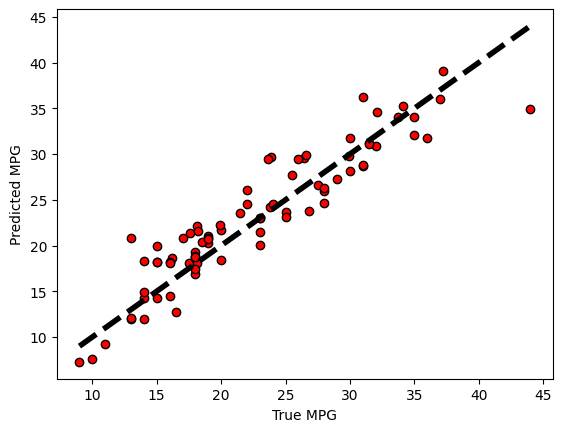

In [75]:
# create linear regression object
from sklearn import linear_model
model = linear_model.LinearRegression()

fit(model, X_train, y_train)

print("***** evaluate predictions on the test set")
mpg_y_test_pred = model.predict(X_test)
evaluate(y_test, mpg_y_test_pred)
plot_true_vs_predicted(y_test, mpg_y_test_pred)

Mean Squared Error (MSE) = 7.630090648166705


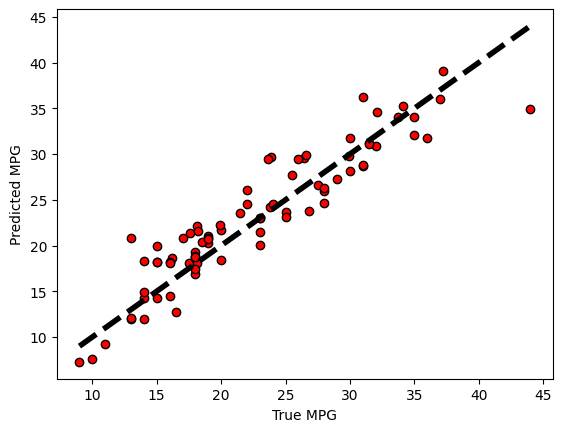

In [76]:
model_minmax = linear_model.LinearRegression()

fit(model_minmax, X_train_minmax, y_train)
X_test_minmax = minmax_scaler.transform(X_test)
mpg_y_pred_minmax = model_minmax.predict(X_test_minmax)
evaluate(y_test, mpg_y_pred_minmax)
plot_true_vs_predicted(y_test, mpg_y_pred_minmax)

k-fold cross validation

In [77]:
from sklearn.model_selection import cross_val_score
cv_model = linear_model.LinearRegression()

cv_scores = cross_val_score(cv_model, X, y, cv=10)

print(f"***** Cross Validation summary *****")
for v in range(0, len(cv_scores)):
  print(f"R2 score on fold-{v+1} = {cv_scores[v]}")

***** Cross Validation summary *****
R2 score on fold-1 = 0.6041326578468736
R2 score on fold-2 = 0.8565015153682389
R2 score on fold-3 = 0.7138345724735442
R2 score on fold-4 = 0.8222691442914533
R2 score on fold-5 = 0.7158923422312298
R2 score on fold-6 = 0.8352329305549226
R2 score on fold-7 = 0.6791753468157625
R2 score on fold-8 = 0.6944938289141571
R2 score on fold-9 = 0.36014457330381067
R2 score on fold-10 = 0.021184250592685472


In [79]:
import sklearn
from sklearn.model_selection import KFold

sklearn.metrics.get_scorer_names()

print(f"Average 10-fold cross validation R2 score: {cv_scores.mean()} (+/- {cv_scores.std()})")

cv_scores = cross_val_score(cv_model, X, y, cv=KFold(n_splits=10, shuffle=True, random_state=1337))

print(f"***** Cross Validation summary *****")
for v in range(0, len(cv_scores)):
  print(f"R2 score on fold-{v+1} = {cv_scores[v]}")

print(f"Average 10-fold cross validation R2 score with random shuffling: {cv_scores.mean()} (+/- {cv_scores.std()})")

Average 10-fold cross validation R2 score: 0.8530088176184153 (+/- 0.02660825621771968)
***** Cross Validation summary *****
R2 score on fold-1 = 0.8666376191665296
R2 score on fold-2 = 0.8532271288190376
R2 score on fold-3 = 0.88471558100425
R2 score on fold-4 = 0.8469039098839404
R2 score on fold-5 = 0.8721702248070299
R2 score on fold-6 = 0.8417854183967052
R2 score on fold-7 = 0.8086233273112611
R2 score on fold-8 = 0.8965168237599542
R2 score on fold-9 = 0.8441398867368267
R2 score on fold-10 = 0.8153682562986185
Average 10-fold cross validation R2 score with random shuffling: 0.8530088176184153 (+/- 0.02660825621771968)


In [80]:
# instead of splitting in training and test set, we can use k-fold cross validation

from sklearn.model_selection import cross_validate

cv_model = linear_model.LinearRegression()

scoring = ["r2"]
cv_scores = cross_validate(cv_model, X, y, scoring=scoring, cv=KFold(n_splits=10, shuffle=True, random_state=1337))

print("***** Cross Validation sumary *****")
for k in cv_scores:
  for v in cv_scores[k]:
    print(f"{k} = {v:.5f}")

***** Cross Validation sumary *****
fit_time = 0.08048
fit_time = 0.02564
fit_time = 0.00112
fit_time = 0.00673
fit_time = 0.00098
fit_time = 0.00091
fit_time = 0.00089
fit_time = 0.00840
fit_time = 0.00276
fit_time = 0.00431
score_time = 0.00272
score_time = 0.00082
score_time = 0.00050
score_time = 0.00068
score_time = 0.00048
score_time = 0.00046
score_time = 0.00046
score_time = 0.00131
score_time = 0.00068
score_time = 0.00249
test_r2 = 0.86664
test_r2 = 0.85323
test_r2 = 0.88472
test_r2 = 0.84690
test_r2 = 0.87217
test_r2 = 0.84179
test_r2 = 0.80862
test_r2 = 0.89652
test_r2 = 0.84414
test_r2 = 0.81537


Mean Squared Error (MSE) = 8.633397288030475


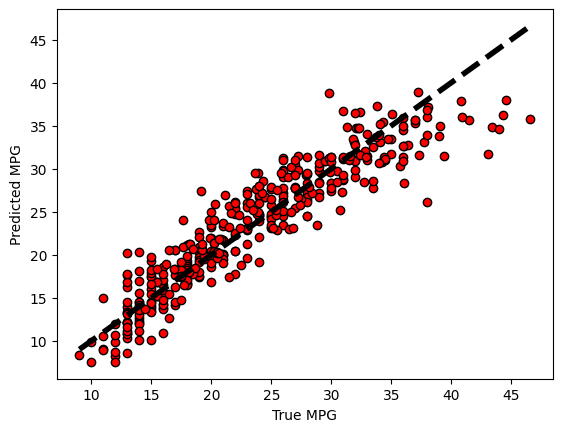

In [81]:
# use the output of k-fold cross validation to generate predictions

from sklearn.model_selection import cross_val_predict

cv_model = linear_model.LinearRegression()
mpg_y_pred_cv = cross_val_predict(cv_model, X, y, cv=KFold(n_splits=10, shuffle=True, random_state=1337))

evaluate(y, mpg_y_pred_cv)
plot_true_vs_predicted(y, mpg_y_pred_cv)

Mean Squared Error (MSE) = 8.636237901349926


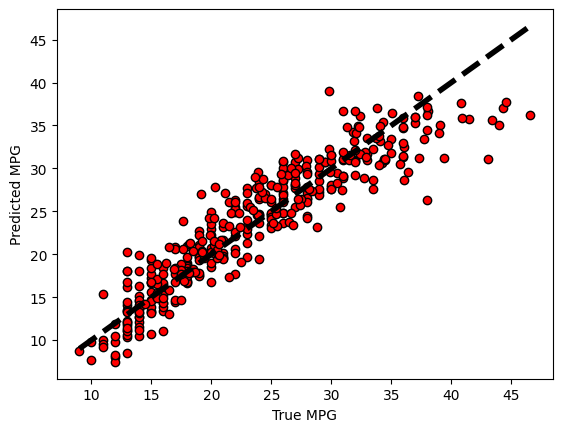

In [82]:
# leave-one-out cross validation (k=n, number of observations)

from sklearn.model_selection import cross_val_predict

cv_model = linear_model.LinearRegression()
mpg_y_pred_cv = cross_val_predict(cv_model, X, y, cv=X.shape[0])
evaluate(y, mpg_y_pred_cv)
plot_true_vs_predicted(y, mpg_y_pred_cv)